In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [34]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [35]:
color = sb.color_palette()[0]

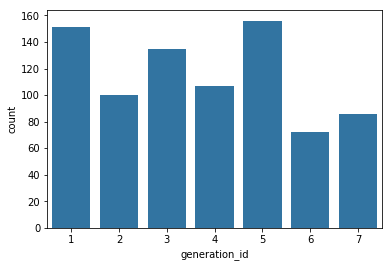

In [36]:
# need to be in the same cell so that can get the responded locs, labels
sb.countplot(data = pokemon, x =pokemon['generation_id'], color = color)
locs, labels = plt.xticks()

In [37]:
# need to change index type to string so that can call it correcly
counts = pokemon['generation_id'].value_counts()
counts.index = counts.index.astype(str)
counts

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [38]:
print(locs, [i.get_text() for i in labels])

[0 1 2 3 4 5 6] ['1', '2', '3', '4', '5', '6', '7']


In [39]:
counts[[i.get_text() for i in labels]]

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

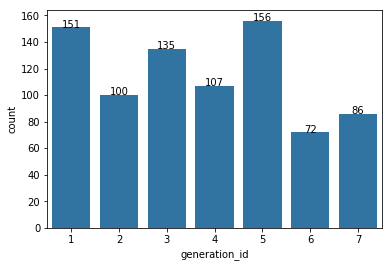

In [40]:
sb.countplot(data = pokemon, x =pokemon['generation_id'], color = color)
locs, labels = plt.xticks()
counts = pokemon['generation_id'].value_counts()
counts.index = counts.index.astype(str)
for loc, label in zip(locs, labels):
    text_height = counts[label.get_text()]
    text = counts[label.get_text()]
    plt.text(x = loc, y = text_height, s = text, ha = 'center');

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

In [ ]:
bar_chart_solution_1()

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [41]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [49]:
percent =(pkmn_types['type'].value_counts()/pokemon.shape[0])*100
percent

water       16.232962
normal      13.506815
flying      12.143742
grass       12.019827
psychic     10.161090
bug          9.541512
poison       8.178439
ground       7.930607
fire         7.930607
rock         7.434944
fighting     6.691450
electric     5.947955
fairy        5.824040
steel        5.824040
dark         5.700124
dragon       5.576208
ghost        5.328377
ice          4.213135
Name: type, dtype: float64

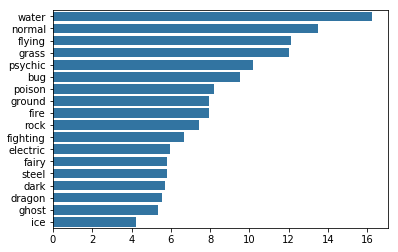

In [104]:
sb.barplot(y = percent.index, x = percent.values, color= color);

I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


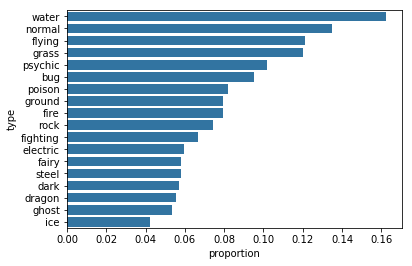

In [51]:
bar_chart_solution_2()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!